# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

,age,operation_Year,axil_nodes,survival_status
0,age,year,nodes,status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

## Printing shape, column names, value_counts for output label

In [16]:
print("df shape:"+ str(df.shape)+"\n" +"columns:"+ str(df.columns))
print("*************************************************************")
print(df["survival_status"].value_counts())

df shape:(307, 4)
columns:Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')
*************************************************************
1         225
2          81
status      1
Name: survival_status, dtype: int64


As survival status has 225 as "1" and 81 as "2" therefore 225/(225+81)= 73.5% as "1" and 26.5% as "2", So it is fairly balanced data.

## Checking unique values in each columns

In [17]:
df.age.unique()

array(['age', '30', '31', '33', '34', '35', '36', '37', '38', '39', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '83'], dtype=object)

In [18]:
df.operation_Year.unique()

array(['year', '64', '62', '65', '59', '58', '60', '66', '61', '67', '63',
       '69', '68'], dtype=object)

In [19]:
len(df.operation_Year.unique())

13

In [20]:
df.axil_nodes.unique()

array(['nodes', '1', '3', '0', '2', '4', '10', '9', '30', '7', '13', '6',
       '15', '21', '11', '5', '23', '8', '20', '52', '14', '19', '16',
       '12', '24', '46', '18', '22', '35', '17', '25', '28'], dtype=object)

In [21]:
df.survival_status.unique()

array(['status', '1', '2'], dtype=object)

In [22]:
df['age'] = pd.to_numeric(df['age'],errors = 'coerce')

In [23]:
df['operation_Year'] = pd.to_numeric(df['operation_Year'],errors = 'coerce')

In [24]:
df['axil_nodes'] = pd.to_numeric(df['axil_nodes'],errors = 'coerce')

In [27]:
df['survival_status'] = pd.to_numeric(df['survival_status'],errors = 'coerce')

## Checking for nan value

In [36]:
print("age type: "+str(df['age'].dtypes))

age type: float64


In [38]:
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)

In [39]:
df.head()

,age,operation_Year,axil_nodes,survival_status
1,30.0,64.0,1.0,1.0
2,30.0,62.0,3.0,1.0
3,30.0,65.0,0.0,1.0
4,31.0,59.0,2.0,1.0
5,31.0,65.0,4.0,1.0


In [40]:
df.isna().sum()

age                0
operation_Year     0
axil_nodes         0
survival_status    0
dtype: int64

There is no nan values in dataframe

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

1. The objective of the problem is to do EDA by plotting various plots.
2. We need to find which feature is important(feature importance).
3. See if data is linearly separable or not and which classifier is suitable for it.

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

## PDF PLOT

float64


c:\users\divya\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\divya\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


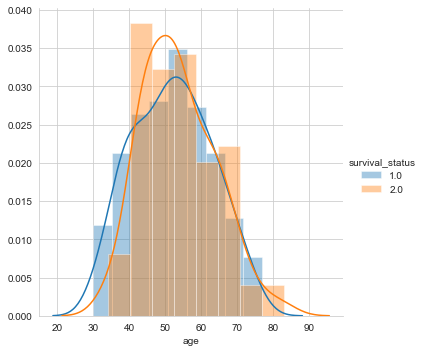

In [41]:
print(df['age'].dtype)
sns.set_style('whitegrid')
sns.FacetGrid(df, hue= 'survival_status',height=5).map(sns.distplot,"age").add_legend()
plt.show()

c:\users\divya\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\divya\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


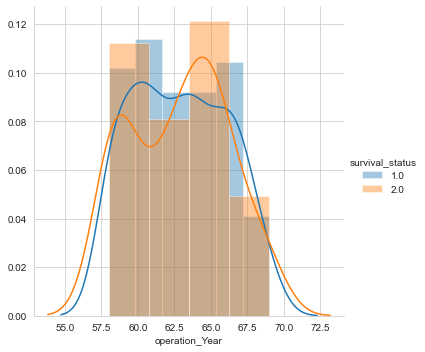

In [42]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue= 'survival_status',height=5).map(sns.distplot,"operation_Year").add_legend()
plt.show()

c:\users\divya\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\divya\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


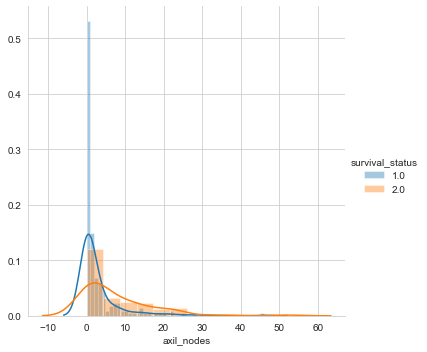

In [43]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue= 'survival_status',height=5).map(sns.distplot,"axil_nodes").add_legend()
plt.show()

*OBSERVATION On PDF PLOT:*<br>
Looking all the 3 pdf plots (age,operation_year,axil_nodes) wrt 'survival_status', i can say that for each feature , pdf of output label(survival status) is highly overlapping. Thus we can not separate 1,2 class using if-else.<br>
PDF of "age" wrt survival status is normal distribution.<br>
PDF of "operation_Year" wrt survival status is like to normal distribution.<br>
PDF of "axil_nodes" wrt survival status is pareto distribution.for blue pdf we can see majority of survival_status=1 is at axil_nodes=0.<br>
As number of survival_status = 1 > that of 2, so we can consider those datapoints that are in $\mu+3\sigma$ of blue pdf(survival_status = 1) as important and eliminate other data points in blue pdf.

## CDF PLOT

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


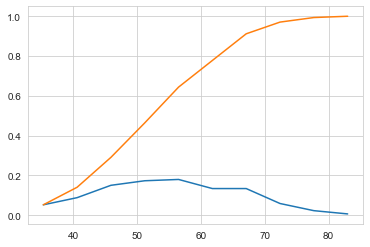

In [44]:
counts, bin_edges = np.histogram(df["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.FacetGrid(df, hue= 'survival_status',height=5).map(sns.ecdfplot,"age").add_legend()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue= 'survival_status',height=5).map(sns.ecdfplot,"operation_Year").add_legend()
plt.show()

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue= 'survival_status',height=5).map(sns.ecdfplot,"axil_nodes").add_legend()
plt.xticks(rotation = 90)
plt.show()

*OBSERVATION OF CDF PLOT:*<br>
In CDF plot of axil_nodes, nearly 80 percent of survival_data is "1" at axil_nodes=0 whereas nearly 45 percent of survival_data is "0" at axil_nodes=0

## BOX PLOT

In [ ]:
sns.boxplot(x='survival_status',y='age', data=df.astype("int64"))
plt.show()

In [ ]:
sns.boxplot(x='survival_status',y='operation_Year', data=df.astype("int64"))
plt.show()

In [ ]:
sns.boxplot(x='survival_status',y='axil_nodes', data=df.astype("int64"))
plt.show()

*OBSERVATION OF BOXPLOT:*<br>
In the boxplot of "axil_nodes", We can see many outliers in survival_status=1 but very few outliers survival_status=0.
and the 25 percentile of survival_status=1 and 50 percentile of survival_status=0 are equal. So we can think that axil_nodes is important feature

## VIOLIN PLOT

In [ ]:
sns.violinplot(x='survival_status',y='age', data=df.astype("int64"))
plt.show()

In [ ]:
sns.violinplot(x='survival_status',y='operation_Year', data=df.astype("int64"))
plt.show()

In [ ]:
sns.violinplot(x='survival_status',y='axil_nodes', data=df.astype("int64"))
plt.show()

*OBSERVATION OF VIOLIN PLOT:*<br>
So similar to box plot, if we see violin plot of axil_nodes we can see majority of data(survival_status=1) is situated at axil_nodes=0, while that of data(survival_status=0) is spreaded(variance is high).

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


## 2D SCATTERPLOT

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue= 'survival_status',height=5).map(plt.scatter,'age',"operation_Year").add_legend()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue= 'survival_status',height=5).map(plt.scatter,'age',"axil_nodes").add_legend()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue= 'survival_status',height=5).map(plt.scatter,'operation_Year',"axil_nodes").add_legend()
plt.xticks(rotation = 90)
plt.show()

*OBSERVATION OF 2D SCATTER PLOT:*<br>
In 1st and 3rd 2D scatterplot, we can see survival_status is highly overlapping. So if we have to choose two out of three feature i will choose 'axil_nodes' and 'age'. 

In [ ]:
df.astype("int64").corr()

Seeing correlation matrix , we can see we can not remove any column. because there is very little correlation between the feature.

## PAIRPLOT

In [ ]:
sns.pairplot(df.astype('int64'), hue="survival_status",palette="bright")

*OBSERVATION OF PAIRPLOT:*<br>
Observation of pairplot is similar to that of 2D scatterplot. 

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

## CONCLUSION

1. The output label is highly overlapping, So data is non linear in nature.
2. Moreover we can not draw any decision boundary to separate output.
3. The data is separated in density form, So we can use KNN algorithm to get output.
4. We can not remove any feature as there is very less corellation between features.